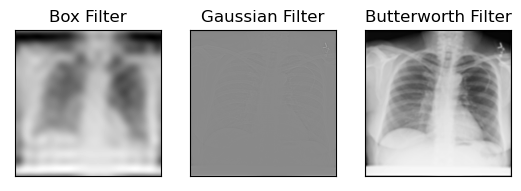

SNR (Box Filtered Image): -84.25240917236599
RMSE (Box Filtered Image): 169353.6593180223
SNR (Gaussian Filtered Image): -100.1678228924341
RMSE (Gaussian Filtered Image): 1058193.9425421937
SNR (Butterworth Filtered Image): -84.23338445566087
RMSE (Butterworth Filtered Image): 168983.12969715698


C:\Users\umasr\AppData\Local\Temp\ipykernel_12428\1071974558.py:68: ComplexWarning: Casting complex values to real discards the imaginary part
  return 10 * log10(np.mean(img ** 2) / mse)
C:\Users\umasr\AppData\Local\Temp\ipykernel_12428\1071974558.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
  return sqrt(np.mean((img - filtered_img) ** 2))


In [5]:
#importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import log10, sqrt

img = cv2.imread(r"C:\Users\umasr\Downloads\xray.png", 0)

#applying fourier transform to convert img to frequency domain
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

#Create lowpass filters
# a. box filter
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
box_filter = np.zeros((rows, cols), np.uint8)
box_filter[crow - 10: crow + 10, ccol - 10: ccol + 10] = 1

#b.gaussian filter
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
x = np.arange(cols)
y = np.arange(rows)
X, Y = np.meshgrid(x, y)
gaussian_filter = np.sqrt((X - ccol) ** 2 + (Y - crow) ** 2)


#c.butterworth filter
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
D0 = 50
n = 2
x = np.arange(cols)
y = np.arange(rows)
X, Y = np.meshgrid(x, y)
D = np.sqrt((X - ccol) ** 2 + (Y - crow) ** 2)
butterworth_filter = 1 / (1 + (D / D0) ** (2 * n))

#apply filter to image in frequency domain
filtered_box = fshift * box_filter
filtered_gaussian = fshift * gaussian_filter
filtered_butterworth = fshift * butterworth_filter

#aplly inverse fourier transform to get original image back from frequency domain
img_box = np.fft.ifft2(np.fft.ifftshift(filtered_box)).real
img_gaussian = np.fft.ifft2(np.fft.ifftshift(filtered_gaussian)).real
img_butterworth = np.fft.ifft2(np.fft.ifftshift(filtered_butterworth)).real


#display filtered images
plt.subplot(131),plt.imshow(img_box, cmap = 'gray')
plt.title('Box Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_gaussian, cmap = 'gray')
plt.title('Gaussian Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_butterworth, cmap = 'gray')
plt.title('Butterworth Filter'), plt.xticks([]), plt.yticks([])
plt.show()

#save filtered files
cv2.imwrite('box_filtered_image.png', img_box)
cv2.imwrite('gaussian_filtered_image.png', img_gaussian)
cv2.imwrite('butterworth_filtered_image.png', img_butterworth)

#Finding out SNR and RMSE values
def calculate_snr(img, filtered_img):
    mse = np.mean((img - filtered_img) ** 2)
    return 10 * log10(np.mean(img ** 2) / mse)

def calculate_rmse(img, filtered_img):
    return sqrt(np.mean((img - filtered_img) ** 2))

print('SNR (Box Filtered Image):', calculate_snr(img, filtered_box))
print('RMSE (Box Filtered Image):', calculate_rmse(img, filtered_box))
print('SNR (Gaussian Filtered Image):', calculate_snr(img, filtered_gaussian))
print('RMSE (Gaussian Filtered Image):', calculate_rmse(img, filtered_gaussian))
print('SNR (Butterworth Filtered Image):', calculate_snr(img, filtered_butterworth))
print('RMSE (Butterworth Filtered Image):', calculate_rmse(img, filtered_butterworth))




